## Plotly

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
# Plotly Styles
px.defaults.height = 576
px.defaults.width = 1024
# To render non interactive charts
import plotly.io as pio
pio.renderers.default = 'png'

#### Line Charts

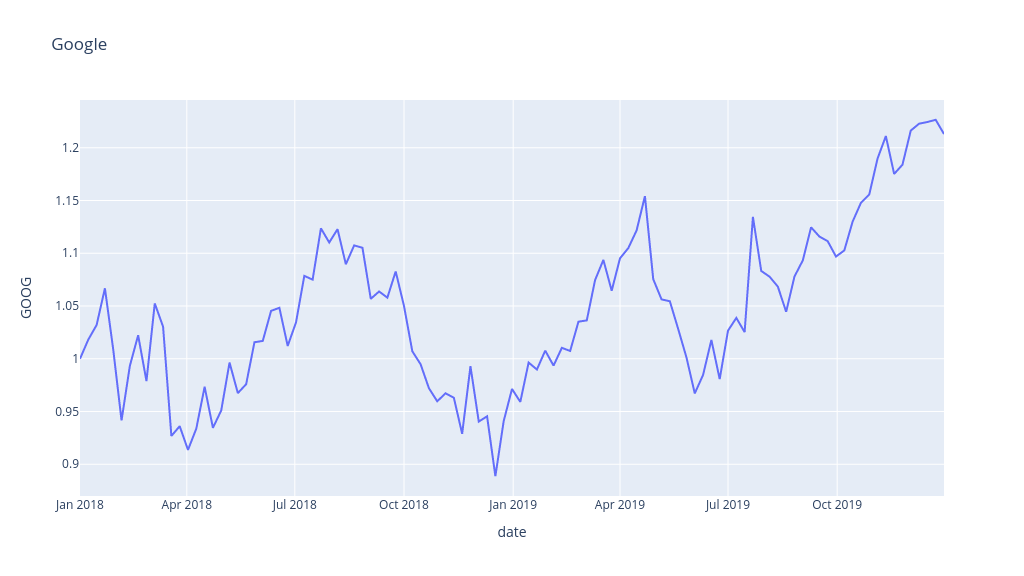

In [3]:
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', title='Google')

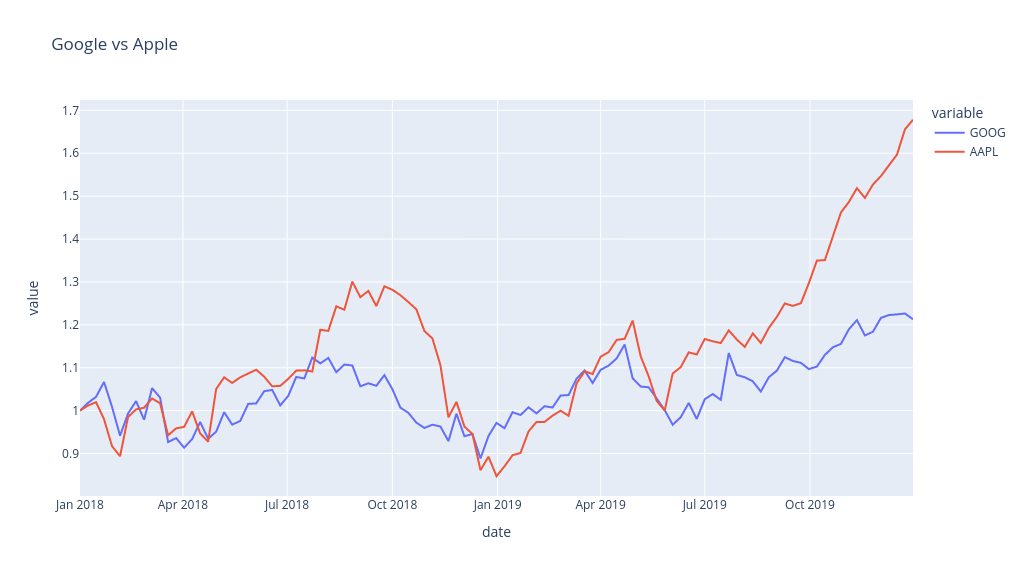

In [4]:
# Multiple line plots
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], title='Google vs Apple')

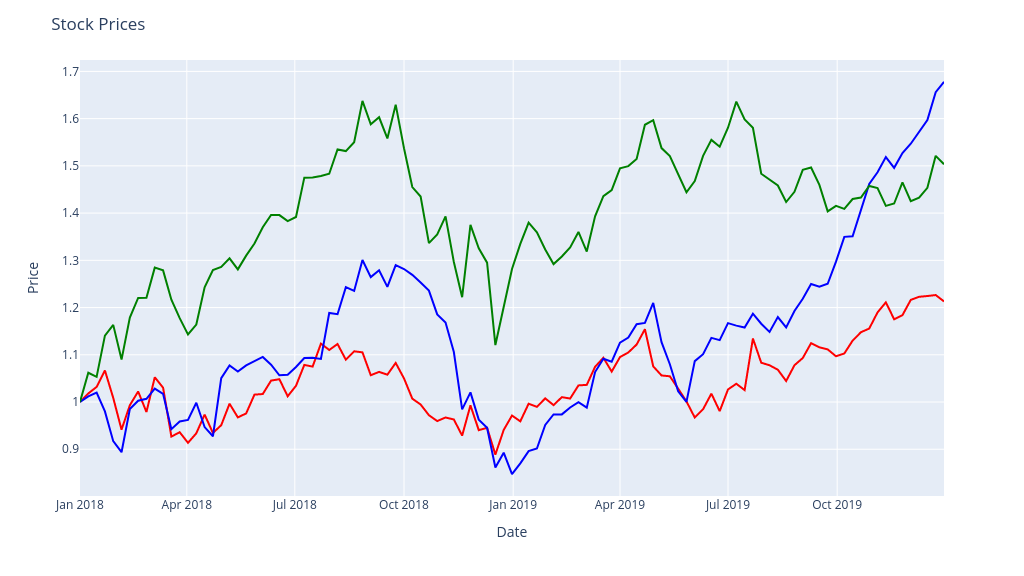

In [5]:
# Multiple charts
fig = px.line(
    df_stocks, x='date', y='GOOG', color_discrete_sequence=['red']
)
fig.add_trace(
    px.line(
        df_stocks, x='date', y='AAPL', color_discrete_sequence=['blue']
    ).data[0]
)
fig.add_trace(
    px.line(
        df_stocks, x='date', y='AMZN', color_discrete_sequence=['green']
    ).data[0]
)
fig.update_layout(
    xaxis_title='Date', yaxis_title='Price', title='Stock Prices'
)
fig.show()

#### Bar Charts

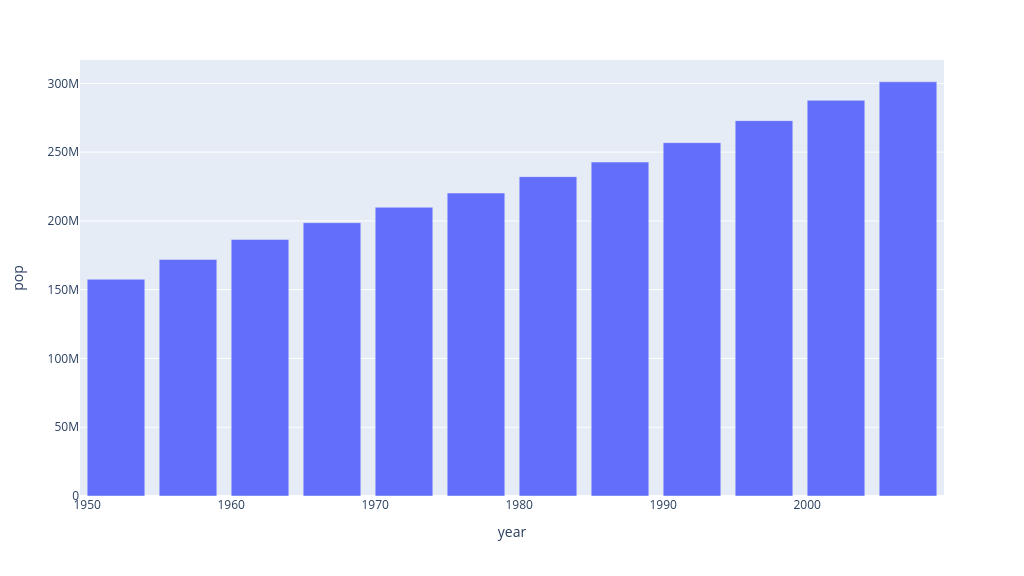

In [6]:
df_us = px.data.gapminder().query('country == "United States"')
px.bar(df_us, x='year', y='pop')

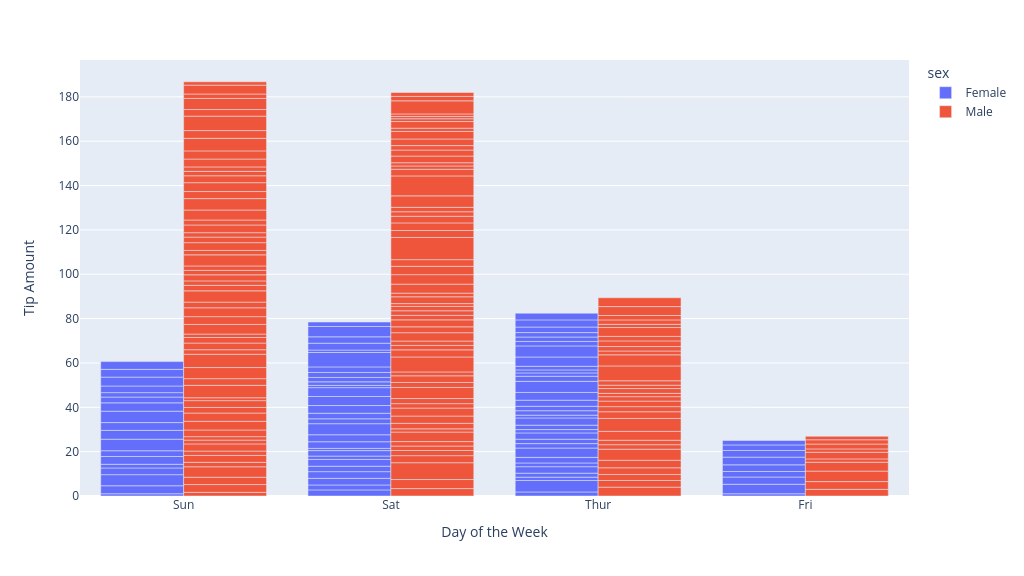

In [7]:
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex',
    labels={
        'tip': 'Tip Amount',
        'day': 'Day of the Week' 
    }, barmode='group'       
)

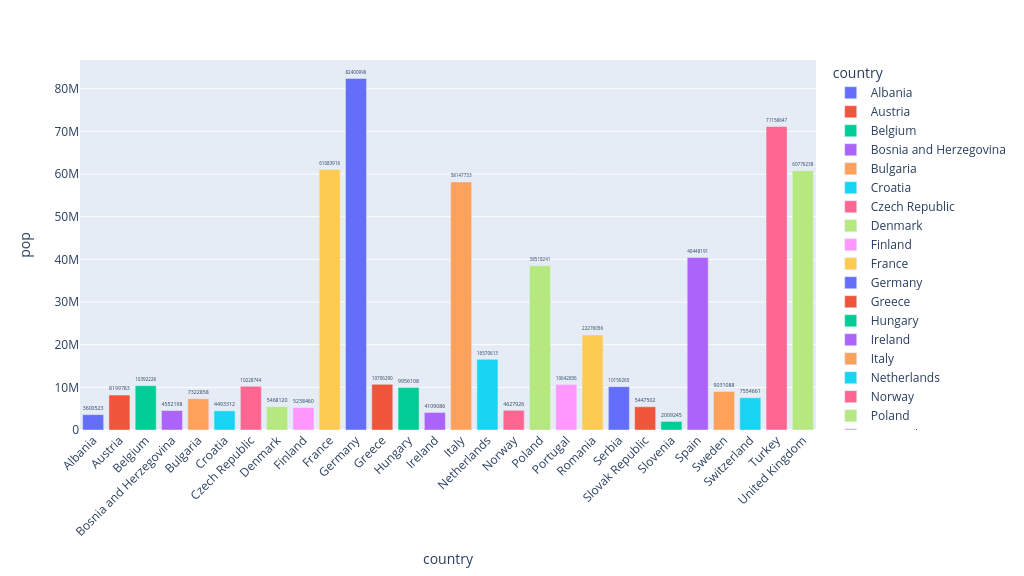

In [8]:
df_europe = px.data.gapminder().query('continent == "Europe" and year == 2007 and pop > 2.e6 ')
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country', )
fig.update_traces(texttemplate='%{text: .2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, xaxis_tickangle=-45)
fig.show()

#### Scatter Plots

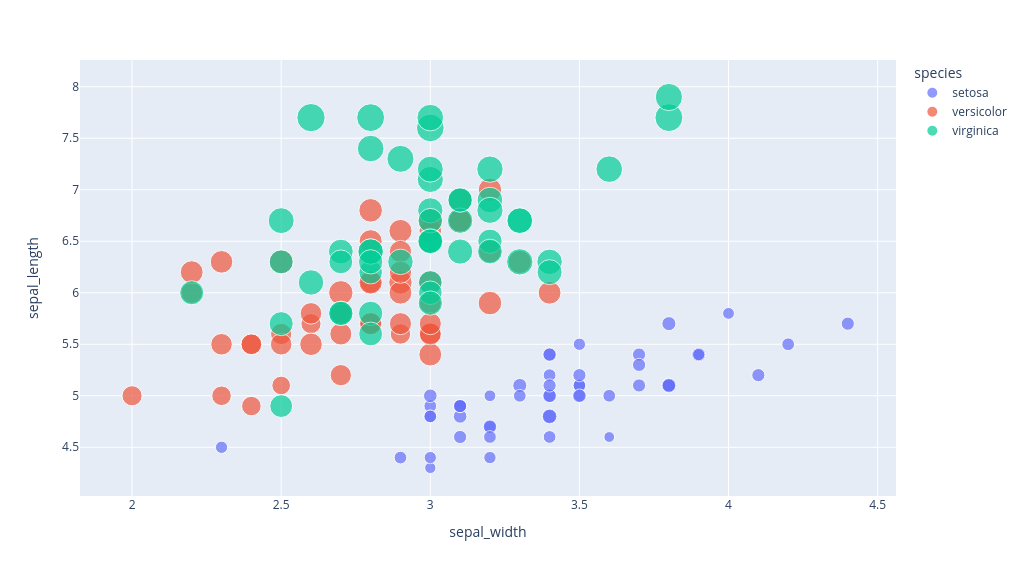

In [9]:
df_iris = px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species',
    size='petal_length', hover_data=['petal_width']           
)

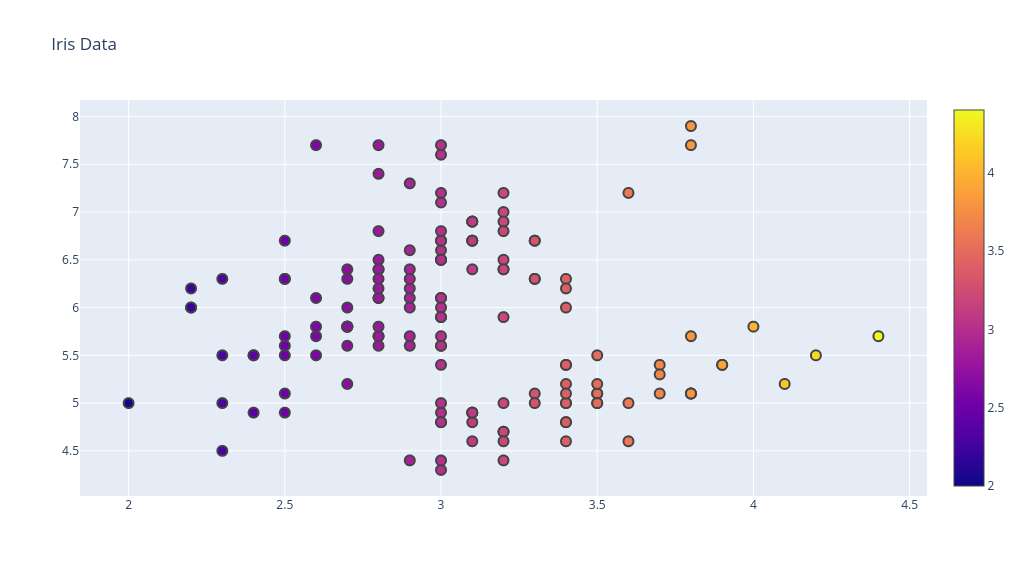

In [10]:
fig = go.Figure()
fig.update_layout(height=576, width=1024)
fig.add_trace(
    go.Scatter(
        x=df_iris.sepal_width,
        y=df_iris.sepal_length,
        mode='markers',
        marker_color=df_iris.sepal_width,
        text=df_iris.species,
        marker=dict(showscale=True),
    ),
)
fig.update_traces(marker_line_width=2, marker_size=10)
fig.update_layout(title='Iris Data')

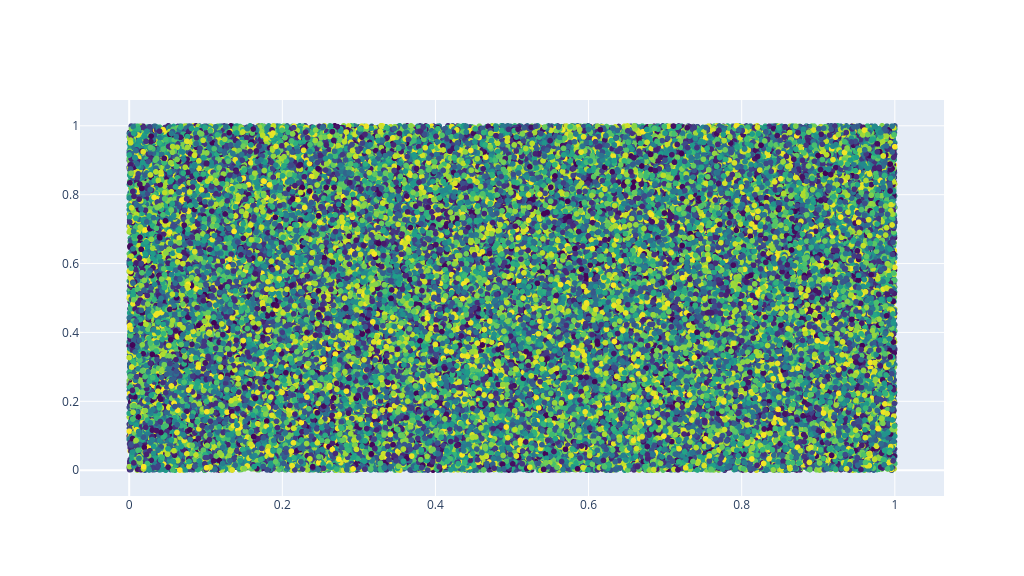

In [11]:
fig = go.Figure(data=go.Scattergl(
    x = np.random.rand(100000),
    y = np.random.rand(100000),
    mode='markers',
    marker=dict(
        color = np.random.rand(100000),
        colorscale= 'Viridis'
    )
))
fig.update_layout(height=576, width=1024)
fig.show()

#### Pie Charts

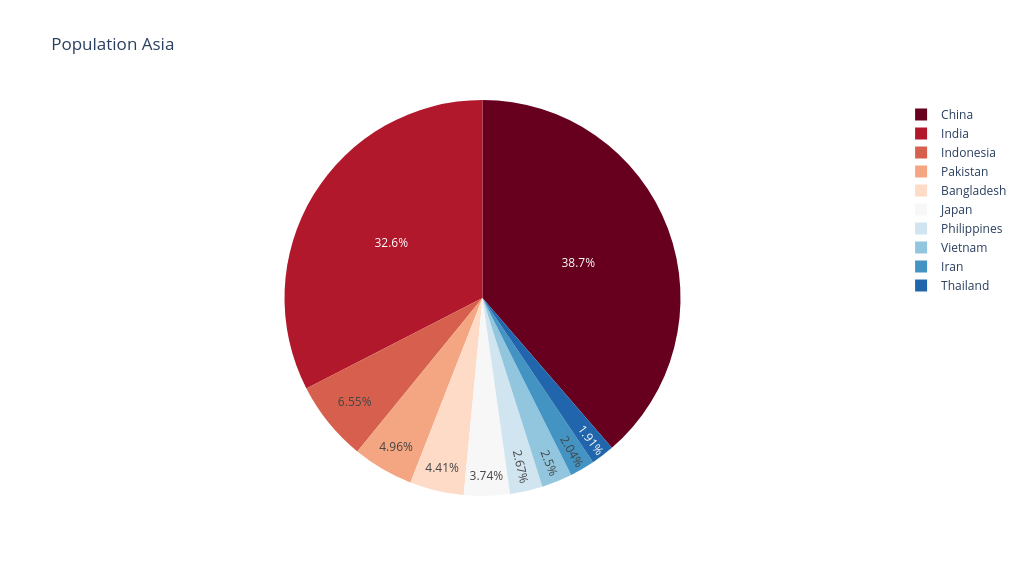

In [12]:
df_asia = px.data.gapminder().query('year == 2007').query('continent == "Asia"')
df_asia = df_asia.sort_values(by=['pop'], ascending=False)[0:10]
fig = px.pie(df_asia, values='pop', names='country', title='Population Asia',
    color_discrete_sequence=px.colors.sequential.RdBu,       
)
fig.show()

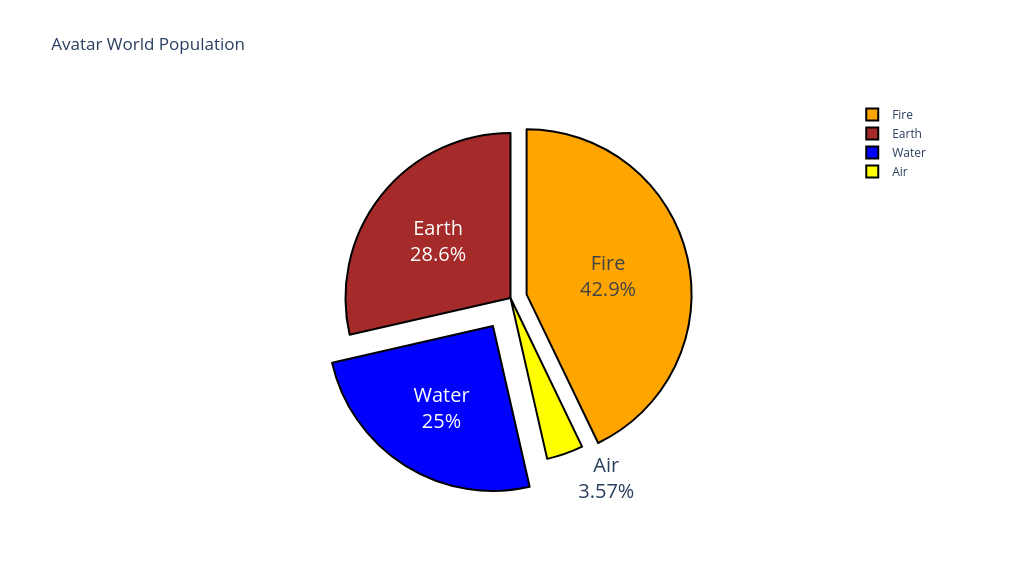

In [13]:
fig = go.Figure(
    data=[go.Pie(
        labels=['Fire', 'Earth', 'Water', 'Air'],
        values=[120, 80, 70, 10]
    )]
)
colors = ['orange', 'brown', 'blue', 'yellow']
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
    textinfo='label+percent',
    pull=[0.1, 0, 0.2, 0],
    marker=dict(
        colors=colors,
        line=dict(color='black', width=2)
    )            
)
fig.update_layout(height=576, width=1024, title='Avatar World Population')
fig.show()

#### Histogram

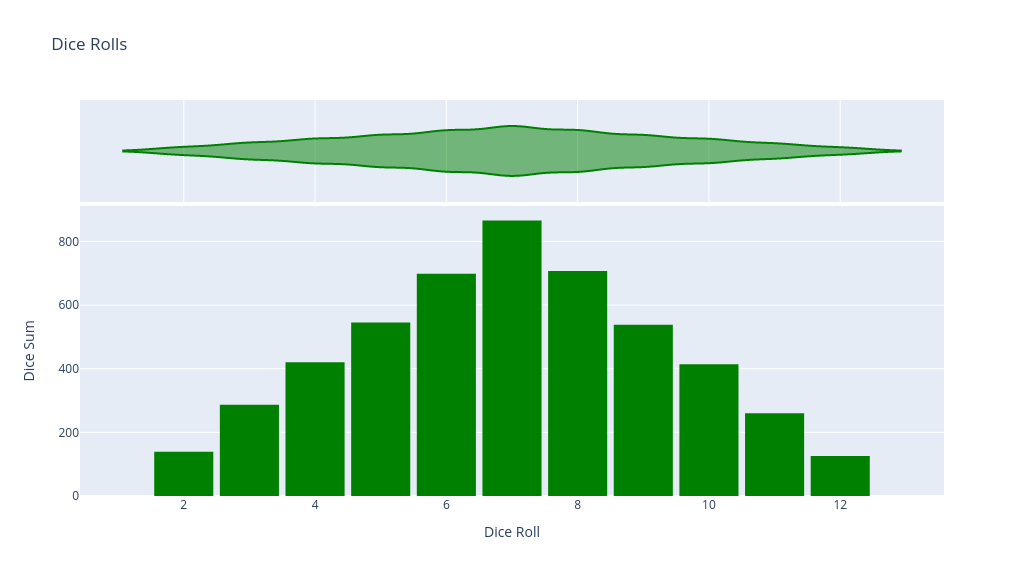

In [14]:
dice_1 = np.random.randint(1,7, 5000)
dice_2 = np.random.randint(1,7, 5000)
dice_sum = dice_1 + dice_2
fig = px.histogram(dice_sum, nbins=11,
    labels={'value': 'Dice Roll'}, title='Dice Rolls',
    marginal='violin', color_discrete_sequence=['green'],
)
fig.update_layout(
    bargap=0.1, xaxis_title_text='Dice Roll',
    yaxis_title_text='Dice Sum', showlegend=False
)
fig.show()

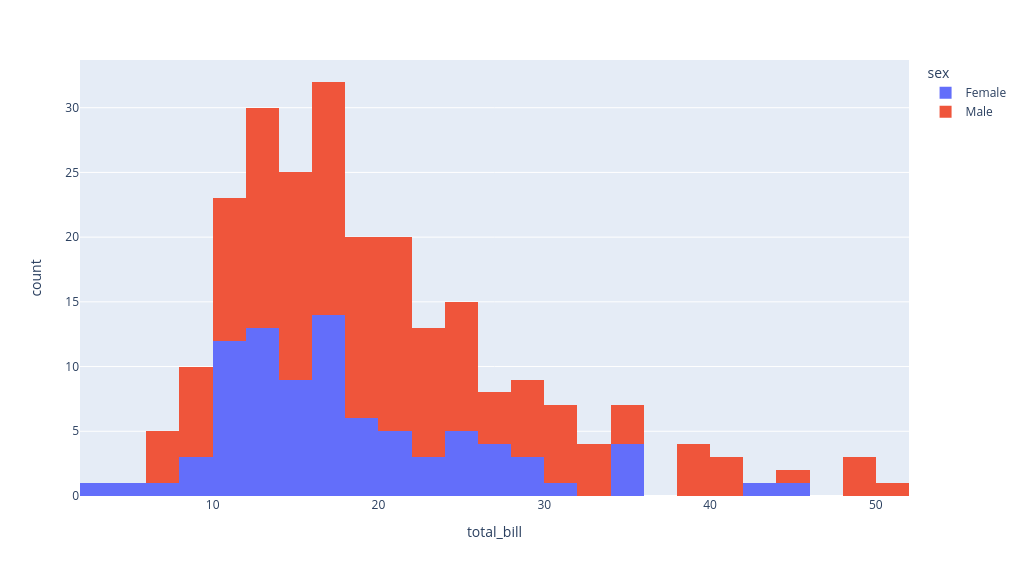

In [15]:
px.histogram(df_tips, x='total_bill', color='sex')

#### Box Plots

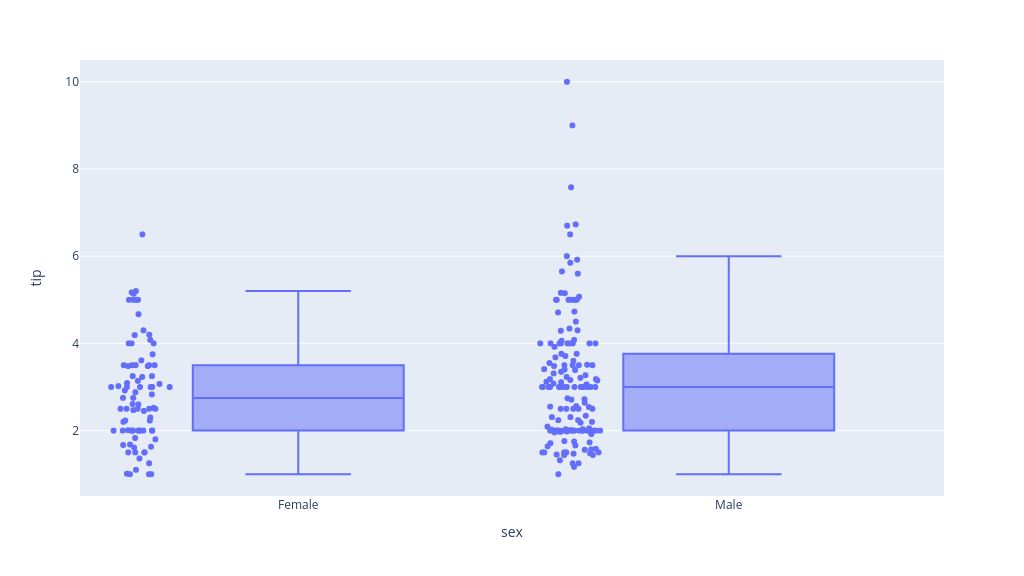

In [16]:
px.box(df_tips, x='sex', y='tip', points='all')

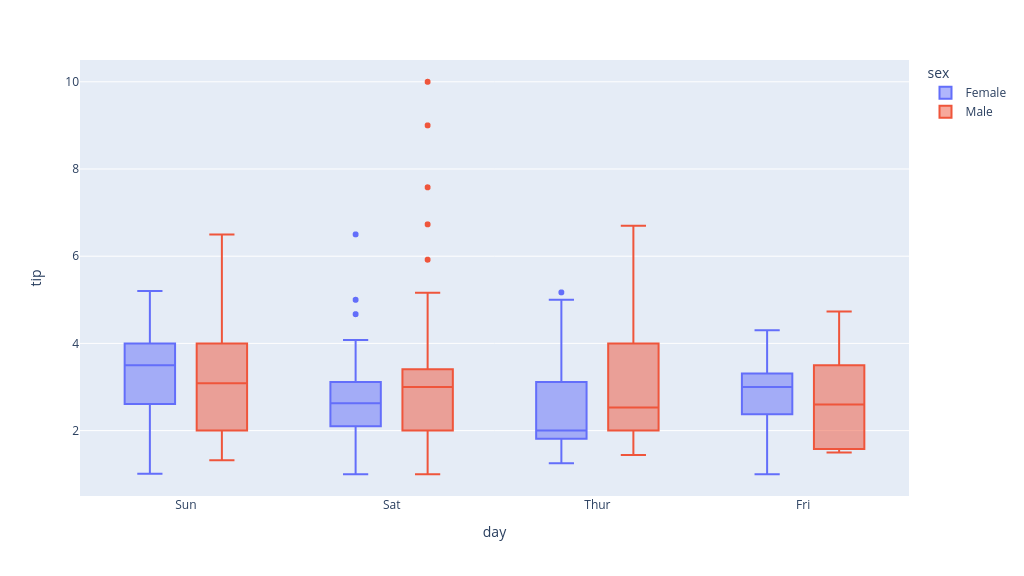

In [17]:
px.box(df_tips, x='day', y='tip', color='sex')

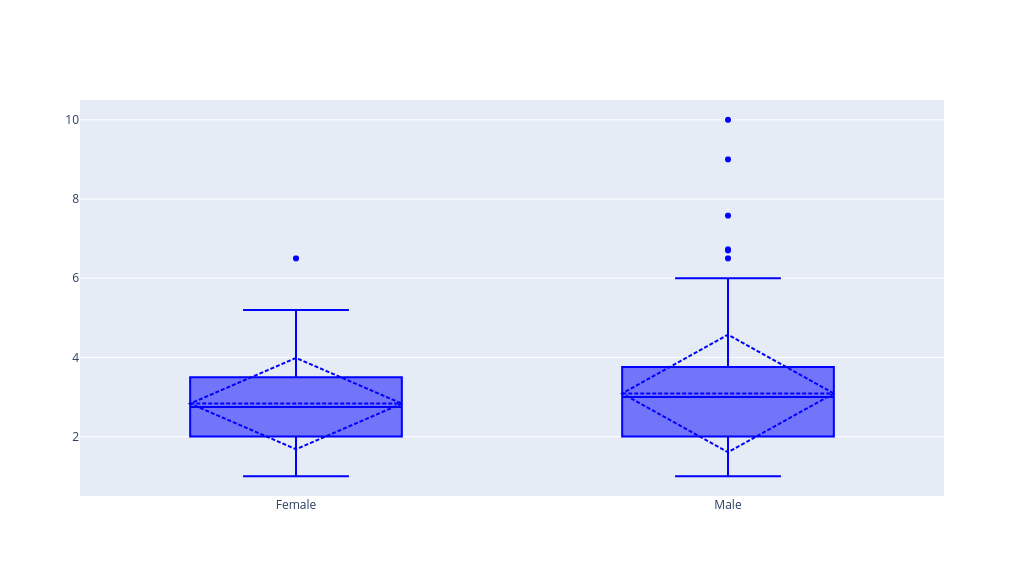

In [18]:
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=df_tips.sex, y=df_tips.tip, marker_color='blue',
        boxmean='sd'
    )
)
fig.update_layout(height=576, width=1024)
fig.show()

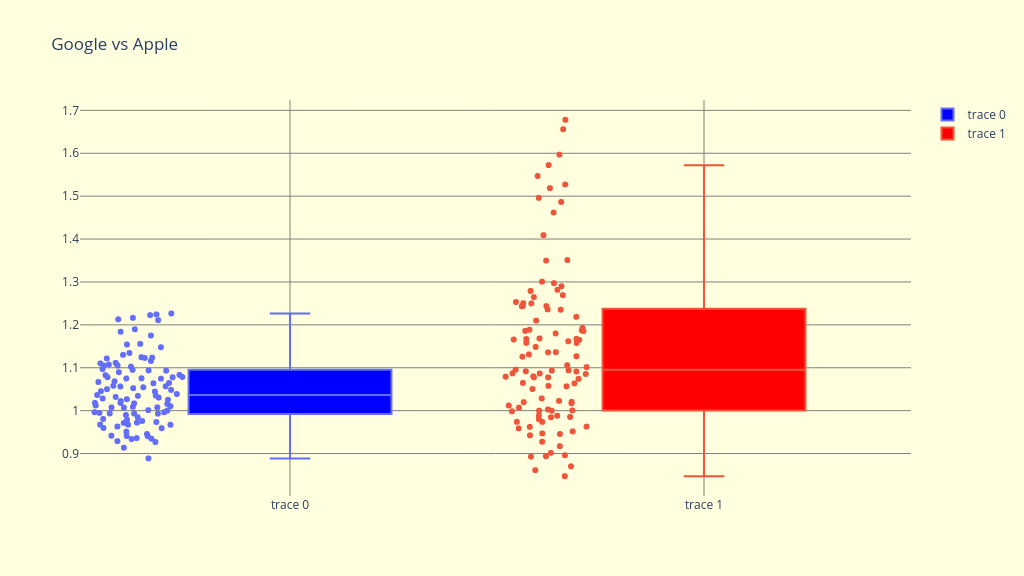

In [19]:
fig = go.Figure()
fig.add_trace(
    go.Box(
        y=df_stocks.GOOG, fillcolor='blue', boxpoints='all',
        jitter=0.5, whiskerwidth=0.2
    )
)
fig.add_trace(
    go.Box(
        y=df_stocks.AAPL, fillcolor='red', boxpoints='all',
        jitter=0.5, whiskerwidth=0.2,
    )
)
fig.update_layout(height=576, width=1024, title='Google vs Apple',
    paper_bgcolor='lightyellow', plot_bgcolor='lightyellow',
    yaxis=dict(gridcolor='grey'),
    xaxis=dict(gridcolor='grey')
)
fig.show()

#### Violin Plots

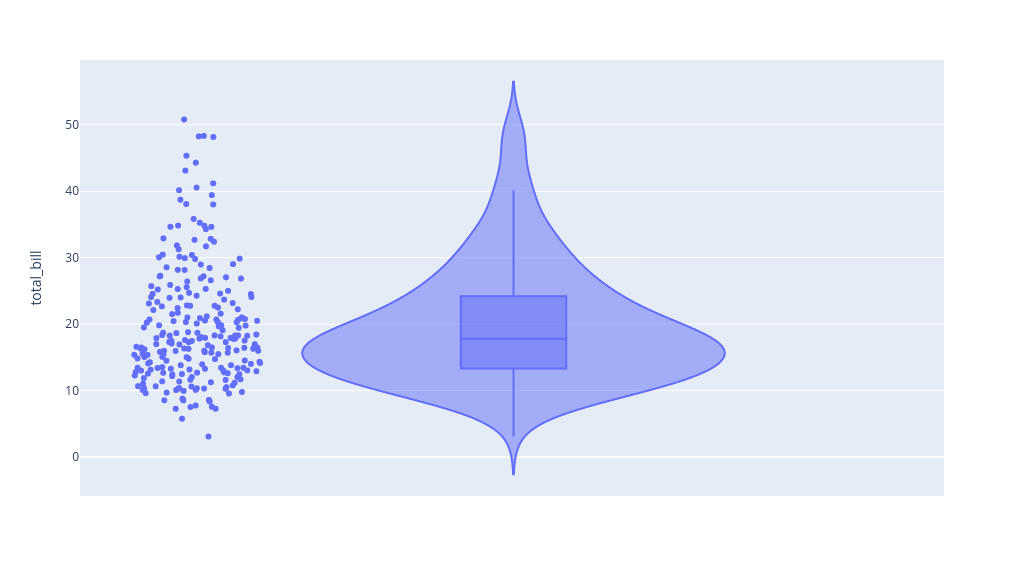

In [20]:
px.violin(df_tips, y='total_bill', box=True, points='all')

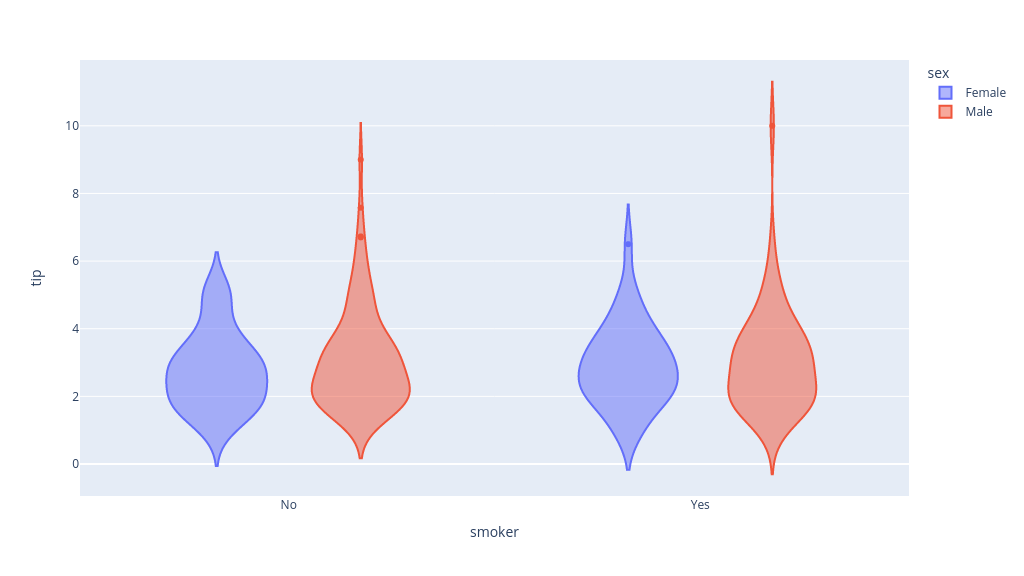

In [21]:
px.violin(df_tips, y='tip', x='smoker', color='sex', hover_data=df_tips.columns)